In [5]:
desktop

In [8]:
load ~/npl/lib/teetool/singleTrial.mat

In [1]:
pyenv("ExecutionMode","OutOfProcess")


ans = 

  PythonEnvironment with properties:

          Version: "3.9"
       Executable: "/home/djoshea/anaconda3/envs/jupyter/bin/python"
          Library: "/home/djoshea/anaconda3/envs/jupyter/lib/libpython3.9.so"
             Home: "/home/djoshea/anaconda3/envs/jupyter"
           Status: NotLoaded
    ExecutionMode: OutOfProcess



In [28]:
world = Teetool.build_world(singleTrial.handXY_singleTrial_time, singleTrial.handXY_singleTrial);

Adding conditions to teetool.World                             8 / 8 [  87.5% ] 
Teetool.build_world ::
  56 Building world model...done


In [79]:
logp_data = Teetool.get_log_likelihood_data(world);

Extracting log likelihood images                               8 / 8 [  87.5% ] 


In [98]:
contour_data = Teetool.get_sd_contours(world);

Extracting contour hulls                                     24 / 24 [  95.8% ] 


In [90]:
means = Teetool.get_means(world);

Extracting mean trajectories                                   4 / 8 [  37.5% ] 


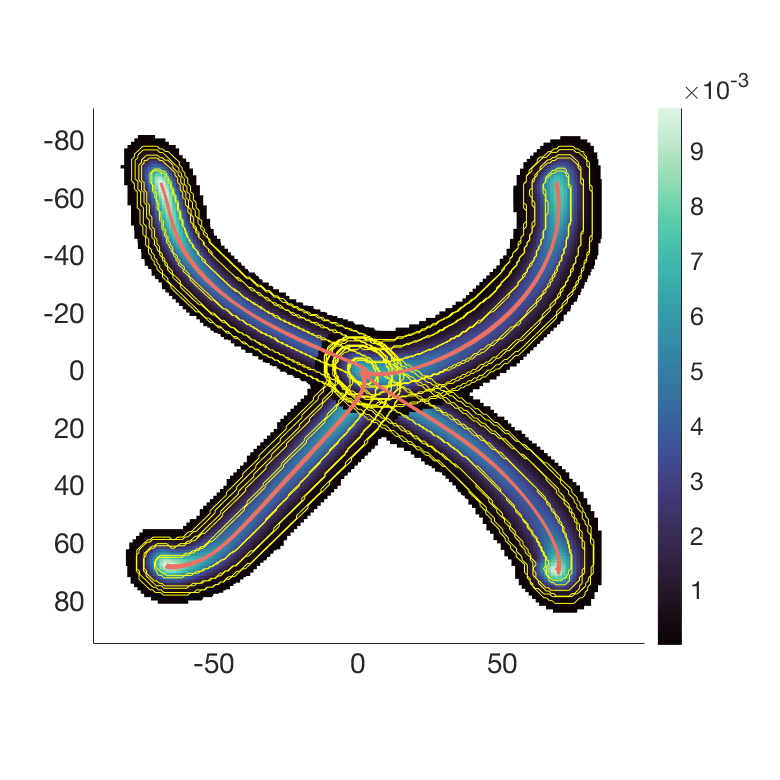

In [105]:
figh = figure();
figSizeScale([6 6]);

for iC = 1:8
    llv = logp_data(iC).logp;
    llv(llv < -10) = NaN;
    h = pmat(exp(llv), x=logp_data(iC).xvec, y=logp_data(iC).yvec);
    hold on;
end

for iC = 1:8
    for iS = 1:size(contour_data, 2);
        plot(contour_data(iC, iS).xvec, contour_data(iC, iS).yvec, 'y-');
    end
end

for iC = 1:8
    plot(means(iC).xvec, means(iC).yvec, Color=hex2rgb('#EC7063'), LineWidth=2);
end

axis equal;
box off;

In [65]:
tube = world.getTube(py.list({int32(1)}));
inside = logical(tube{1}{1});
xin = double(tube{2}{1});
yin = double(tube{2}{2});

In [68]:
logp = world.getLogLikelihood(py.list({int32(1)}));
ll = double(logp{1}{1});
xll = double(logp{2}{1});
yll = double(logp{2}{2});

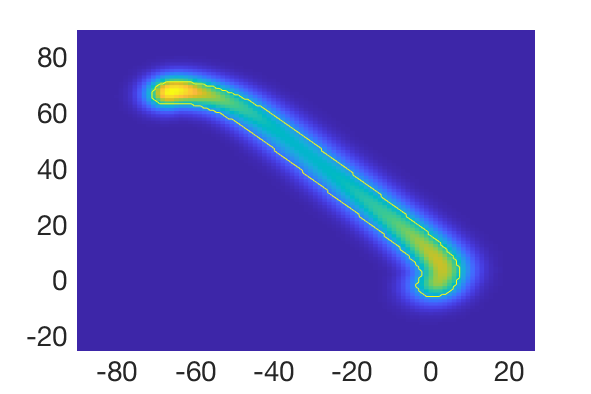

In [73]:
h = pcolor(xll, yll, exp(ll));
h.EdgeColor = "none";
hold on;
cax = caxis();
cout = contour(xin, yin, double(inside), 1);
caxis(cax);

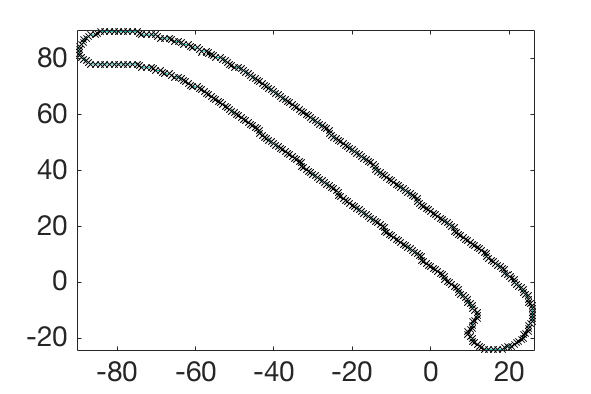

In [54]:
cout = contour(x, y, double(inside), 1);
hold on;
plot(cout(1, 2:end), cout(2, 2:end), 'kx');

In [ ]:
world.eval

In [2]:
cluster_data_1 = py.teetool.helpers.get_trajectories(ntype=int32(0), ndim=int32(2), ntraj=int32(500), ...
    npoints=int32(100), noise_std=0.0);

In [3]:
length(cluster_data_1)


ans =

   500



In [ ]:
outline = py.teetool.helpers.get_cluster_data_outline(cluster_data)

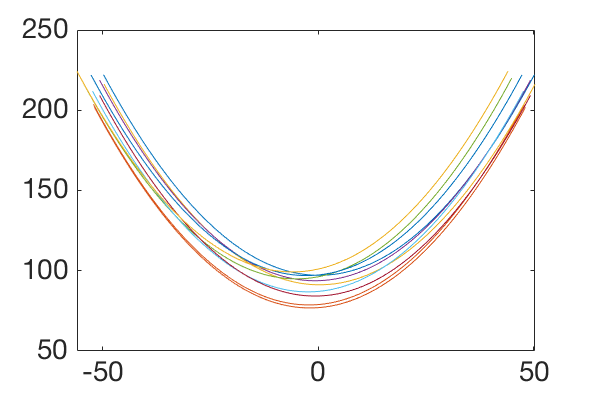

In [4]:
for i = 1:10
    y = double(cluster_data_1{i}{2});
    plot(y(:, 1), y(:, 2))
    hold on;
end

In [ ]:
1